## Introduction

There are many interesting networks in our life. For example, a social network, where nodes are people and edges are connections; citation network, where nodes represents papers and edges are citations; websites, where nodes are webpages and edges are hyperlinks. Have you ever wondered how does Facebook recommend a friend to you, or how Amazon suggests the products that you should buy and Netflix recommands the movies you might like? Or, given a network, what are the important properties we can extract from the network, and what are the these properties imply? In this tutorial, we will show how to do network analytics using [NetworkX](https://networkx.github.io/), a Python library for studying structure and dynamics of complex networks.



## NetworkX Tutorial

This tutorial will cover these topics:
+ [Installation](#installation)  
+ [Loading and visualizing networks](#Loading-and-visualizing-networks)  
+ [Network structural properties](#network-structural-properties)
+ [Friend recommendation on Facebook](#friend-recommendation-on-facebook)

### Installation
If you are using anaconda, NetworkX package is already installed. Otherwise, you can use pip to install networkx
```bash
pip install networkx
```
After the installation, you should be able to import the networkx module:

In [121]:
import networkx as nx

### Loading and visualizing networks

#### Loading networks
We'll use [Facebook Links](http://socialnetworks.mpi-sws.mpg.de/data/facebook-links.txt.gz) file as the data source for the network loading API. The file contains a list of all the user to user links in Facebook. Each line of the file contains two user identifiers, and the third column is the timestamp when the link is established.

After we download the data, we can use the following command to unzip the file.
```bash
gzip -d facebook-links.txt.gz
```

We'll use **read_edgelist** to load this netowrk,and since the graph is undirected, we'll create the graph using **Graph** class, which is the class for undirected graph. The class type for directed graph is **DiGraph**.


In [122]:
f = open("facebook-links.txt")
G_fb = nx.parse_edgelist(f.readlines(), create_using = nx.Graph(), nodetype = int, data=(('timestamp', str),))
# Get a brief summary of the graph
print nx.info(G_fb)

Name: 
Type: Graph
Number of nodes: 63731
Number of edges: 817090
Average degree:  25.6418


#### Plotting networks
It is even better if we could visualize the actual graph, but it takes a lot of time to render the graph of this size, we'll only draw a small subgraph from the original graph using [pyplot](http://matplotlib.org/api/pyplot_api.html).

There are different ways to get a subgraph, for a social network, [ego graph](http://www.analytictech.com/networks/egonet.htm) is a common method to generate a subgraph. A ego subgraph with a single ego node is a graph that contains a person, his/her friends and all connections between them.

In [123]:
# Get an ego graph
import random
ego = nx.ego_graph(G_fb, random.choice(G_fb.nodes()), radius=1, center=True)


Now we can plot the ego graph use pyplot.

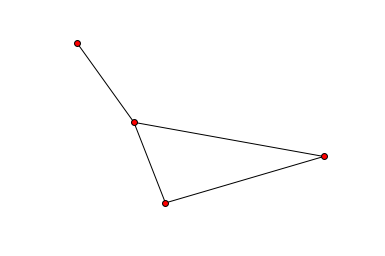

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

spring_pos = nx.spring_layout(ego)
plt.axis("off")
nx.draw_networkx(ego, pos = spring_pos, with_labels = False, node_size = 35)


#### Network/Graph generators
Sometimes, rather than getting network data from the real world, we might want to generate a network using some predefined models. We can use the graph generation functions to generate graphs of certain properties.

$G_{n,p}$ Graph, also known as Erdős-Rényi graph or binomial graph, is a model where each possible edges in the graph has a fixed probability of $p$ to be present. This is a very straightforward way to generate a random graph.


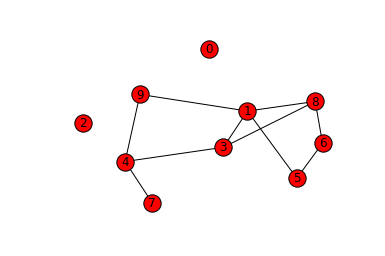

In [125]:
# Generating a Erdős-Rényi graph of 10 nodes with p = 0.3
import matplotlib.pyplot as plt
%matplotlib inline
plt.axis("off")

G = nx.gnp_random_graph(10, 0.3)
spring_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=spring_pos)
# TODO (Maybe) Preferential Attachment graph

### Network structural properties

Even we have a plot of a network, it's still hard to identify what are the interesting parts of a network, and how is one network different from the other. In this section, we'll be looking at a few structural properties of a network and their implications.

##### [Node Centrality](https://networkx.readthedocs.io/en/stable/reference/algorithms.centrality.html) 
Node centrality is a measure of importance for a given node in the graph.
##### Degree Centrality
For example, degree centrality of a node is defined as its degree/(N-1), where N is the number of nodes in the network. A node with larger degree will have higher degree centrality.  

To better understand how the node degrees are distributed, we can draw a degree centrality distribution. Before that, let's first get a subgraph using a random sample of 1000 nodes.

In [126]:
import random
sub_nodes = random.sample(G_fb.nodes(), 1000)
sub = nx.subgraph(G_fb, sub_nodes)

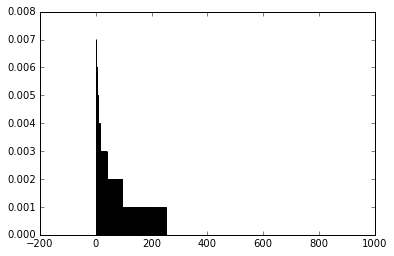

In [127]:
import matplotlib.pyplot as plt
dc = nx.degree_centrality(sub)

degrees = dc.values()
degrees.sort(reverse=True)
plt.bar(range(len(degrees)), degrees, align='center')
plt.show()


As expected, the distribution histogram of degree centrality has a [long tail](https://en.wikipedia.org/wiki/Long_tail), which means their are few people have a lot of friends while most of people have a releatively small number of friends.

##### Closeness Centrality
Another interesting centrality measure is closeness and farness centrality. Farness centrality is the average shortest path length to all other nodes reside in the same connected component. Closeness centrality is the reciprocal of farness centrality. Therefore, a graph with high closeness centrality is more closely "connected" than a graph with a low closeness centrality. We can use the random graph generator function to get a sense of what closeness centrality implies. Using the $G_{n,p}$ model, we can control the average shortest path length by varying the probability parameter, a high probability will give a lower shortest path length and a low probability will give a higher shortest path length.


In [128]:
from numpy import mean
# Generate a random graph of 1000 nodes with probability 0.1
G1 = nx.gnp_random_graph(1000, 0.1)

# Generate a random graph of 1000 nodes with probability 0.5
G2 = nx.gnp_random_graph(1000, 0.5)

print 'Average Closeness Centrality for G1(1000,0.1):', mean(nx.closeness_centrality(G1).values())
print 'Average Closeness Centrality for G2(1000,0.5):', mean(nx.closeness_centrality(G2).values())



Average Closeness Centrality for G1(1000,0.1): 0.526229890155
Average Closeness Centrality for G2(1000,0.5): 0.666865248396


As expected, G2 has a higher average closeness centrality than G1.

#### [Clustering Coefficient](https://networkx.readthedocs.io/en/stable/reference/algorithms.approximation.html#module-networkx.algorithms.approximation.clustering_coefficient) 
Clustering Coefficient is a measure of the degree to which the nodes are clustered together. There are global and local clustering coeficient according to [wikipedia](https://en.wikipedia.org/wiki/Clustering_coefficient). NetworkX supports local clustering coefficient. Local clustering coefficient for a node is defined as the fraction of edges that actually exists among its neighbors over the number of all possible edges. Suppose a vertex v has $k_v$ neighbors, then at most it will have $k_v(k_v - 1)$ edges, local clustering coefficient for node $n$ is formally defined as:  
### $C_n$ = $\frac{2 |\{e_{ij}: v_i, v_j \in N_n, e_{ij} \in E\}|}{k_v(k_v - 1)}$  
Where $N_n$ is the set of nodes that are neighbor of node $n$ and $E$ is the set of edges.  In NetworkX, local clustering coefficient is actually defined as the proportion of all possible triangles in the neighbors of a node, and the function calculates an approximation of the average clustering coefficient. Again, we can use the random graph generator to get a sense of what the clustering coefficient means.

In [129]:
print 'Average Clustering Coefficient for G1(1000,0.1):', nx.average_clustering(G1)
print 'Average Clustering Coefficient for G2(1000,0.5):', nx.average_clustering(G2)

Average Clustering Coefficient for G1(1000,0.1): 0.0998216575197
Average Clustering Coefficient for G2(1000,0.5): 0.500207804488


As expected, a more connected graph will have a higher average clustering coefficient.

#### [Community](https://en.wikipedia.org/wiki/Community_structure)

A network is said to have community structure if the nodes of the network can be easily grouped into sets of nodes such that each sets of nodes are densely connected internally and sparsely connected to the nodes in other sets. So, what exactly does densely connected means? An extreme example would be the set of nodes forms a [clique](https://en.wikipedia.org/wiki/Clique_(graph_theory)), which means, the subgraph consists of these nodes forms a complete graph, NetworkX only supports clique-based methods. In the context of social network, a community could be the set of your high school classmates.

There is a library built on top of NetworkX that performs community detection with more algorithms. We can download and install this library [here](https://bitbucket.org/taynaud/python-louvain/overview).
```bash
git clone https://bitbucket.org/taynaud/python-louvain/overview
```
and run the following command in the code directory:
```bash
python setup.py install
```
##### Community Detection Algorithms

+ [Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) builds a hierachy of clusters, starting from each node having its on cluster and pairs of clusters are merged as one moves up the hierach(in Agglomerative approach). Function *generate_dendrogram* will generate a dictionary mapping from level of hierarchy to the partition. *partition_at_level* takes the result of *generate_dendrogram* and returns a dictionary of the partition, where keys are nodes and values are the index of partition the node belongs to.
+ [Modularity maximization](https://en.wikipedia.org/wiki/Modularity_(networks)) is another algorithm supported in the library. Modularity is a benefit function which measures the quality of a particular division of communities. *best_partition* uses [Louvain](https://en.wikipedia.org/wiki/Louvain_Modularity) heuristices to iteratively improve the local communities partition until the global modularity can no longer be improved given perturbations to the current state.

Since our original network graph is very large and it takes a long time to draw the communities, we'll use the [ego-Facebook](https://snap.stanford.edu/data/egonets-Facebook.html) dataset from SNAP library.


Community Node Distribution(Hierarchical Clustering): Counter({8: 548, 10: 535, 2: 435, 1: 431, 3: 423, 0: 350, 4: 323, 12: 237, 14: 226, 7: 206, 9: 129, 11: 73, 6: 60, 5: 25, 13: 19, 15: 19})
Modularity score for the partition: 0.83497475803


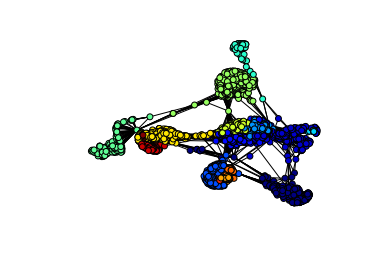

In [130]:
import community
import matplotlib.pyplot as plt
%matplotlib inline
plt.axis("off")

G_fb_small = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
# Community Detection with Hierarchical Clustering
dendrogram = community.generate_dendrogram(G_fb_small)
parts = community.partition_at_level(dendrogram, len(dendrogram) - 1) # get the largest possible communities
values = [parts.get(node) for node in G_fb_small.nodes()]
spring_pos = nx.spring_layout(G_fb_small)
import collections
print 'Community Node Distribution(Hierarchical Clustering):', collections.Counter(values)
print 'Modularity score for the partition:', community.modularity(parts, G_fb_small)
nx.draw_networkx(G_fb_small, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)


Community Node Distribution(Modularity Maximization): Counter({8: 548, 10: 535, 2: 435, 1: 431, 3: 423, 0: 350, 4: 323, 12: 237, 14: 226, 7: 206, 9: 129, 11: 73, 6: 60, 5: 25, 13: 19, 15: 19})
Modularity score for the partition: 0.83497475803


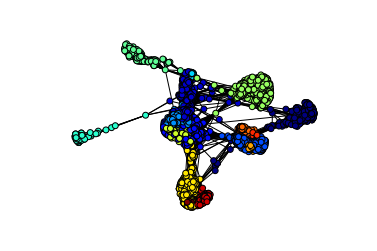

In [131]:
import community
import matplotlib.pyplot as plt
%matplotlib inline
plt.axis("off")


G_fb_small = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
# Community Detection with Modularity Maximization
parts = community.best_partition(G_fb_small)
values = [parts.get(node) for node in G_fb_small.nodes()]
spring_pos = nx.spring_layout(G_fb_small)
import collections
print 'Community Node Distribution(Modularity Maximization):', collections.Counter(values)
print 'Modularity score for the partition:', community.modularity(parts, G_fb_small)
nx.draw_networkx(G_fb_small, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)


Modularity score lies between [-0.5, 1), so the final modularity score for the partition is pretty high, which is reasonable because the input graph is a ego network. Also the result of the two algorithms are the same, which means the two algorithms might have followed the same path of merging different groups of nodes.

### Friend recommendation on Facebook

#### Background

A friend recommendation algorithm takes a graph, which contains the information of connections for each user and a user as arguments, returns the list of persons that are not friends with the given user, sorted by the a recommendation score.

There are two general approaches to do recommendation:
+ **Collaborative filtering** says that if you share interests with some users on some issues, then it's more likely you share interests with them on other issues as well. In the context of friend recommendation, for user A, we want to recommend the friends of friends to A, also, we could order them using some metrics, for example, number of common friends with A.
+ **Content based filtering** considers the content of the things a user has interest in. In the context of friend recommendation, it would be characteristics of existing friends of a user, which is not as appropriate. This would be more suitable for recommending movies or products to buy.

We'll use collaborative filtering in this section.

First, let's create a small example graph to illustrate the algorithms we'll be discussing in this section.

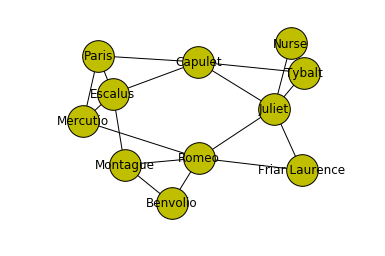

In [132]:
# Create The Romeo and Juliet graph
rj = nx.Graph()

# Add nodes
characters = ['Nurse', 'Tybalt', 'Juliet', 'Capulet', 'Friar Laurence', 'Romeo', 'Benvolio', 'Montague', 'Escalus', 'Mercutio', 'Paris']
for c in characters:
    rj.add_node(c)
    
connections = [('Nurse', 'Juliet'), ('Juliet', 'Tybalt'), ('Juliet', 'Capulet'), ('Juliet', 'Friar Laurence'), ('Juliet', 'Romeo'), ('Tybalt', 'Capulet'), ('Romeo', 'Friar Laurence'), ('Romeo', 'Benvolio'), ('Romeo', 'Montague'), ('Romeo', 'Mercutio'), ('Benvolio', 'Montague'), ('Montague', 'Escalus'), ('Capulet', 'Escalus'), ('Capulet', 'Paris'), ('Escalus', 'Paris'), ('Escalus', 'Mercutio'), ('Mercutio', 'Paris')]
for conn in connections:
    rj.add_edge(conn[0], conn[1])

plt.axis('off')
nx.draw_networkx(rj, pos = nx.spring_layout(rj), node_size=1000, node_color='y')

#### Recommend by number of common friends

If a person Y has a common friend with you, then probably Y should be your friend too. And if Y has more than one common friends, then the probability of Y being your friend is even higher. Therefore, a straightforward way to do friend recommendation is recommend the people who have common friends with you, ordered by the number of common friends.

Frist we'll define a function which returns all the friend of a given user

In [133]:
def friends(graph, user):
    """Returns a set of the friends of the given user, in the given graph.
    The parameter 'user' is the string name of a person in the graph.
    """
    return set(graph.neighbors(user))

Then, we want to get the friends of friends, which is the list of users of potential recommendations.

In [134]:
def friends_of_friends(graph, user):
    """Returns a set of friends of friends of the given user, in the given graph.
    The result does not include the given user nor any of that user's friends.
    """
    s = set([])
    f = friends(graph, user)
    for friend in f:
        s = s.union(friends(graph, friend))
    # remove user
    s = s.difference(set([user]))
    # remove the friends of the user
    s = s.difference(f)
    return s


We'll also need a function that returns the common friends of two users, that way, we can cacluate the number of common friends that a user has with each person in the potential recommendation friend set.

In [135]:
def common_friends(graph, user1, user2):
    """Returns the set of friends that user1 and user2 have in common."""
    return friends(graph, user1).intersection(friends(graph, user2))

Given the above functions, we can define the function that returns a list sorted by number of common friends of a given user, and appear in alphabetical order if the number of common friends is the same.

In [136]:
def number_of_common_friends_map(graph, user):
    """Returns a map from each user U to the number of friends U has in common with the given user.
    The map keys are the users who have at least one friend in common with the
    given user, and are neither the given user nor one of the given user's friends.
    """
    m = {}
    for f in friends_of_friends(graph, user):
        m[f] = len(common_friends(graph, user, f))
    return m

def recommend_by_number_of_common_friends(graph, user):
    """Return a list of friend recommendations for the given user.
    The friend recommendation list consists of names of people in the graph
    who are not yet a friend of the given user.
    The order of the list is determined by the number of common friends.
    """
    m = number_of_common_friends_map(graph, user)
    alphabetical_order = sorted(m.items(), key=lambda (k,v): k)
    num_common = sorted(alphabetical_order, key=lambda (k,v): -v)
    return map(lambda x:x[0], num_common)


Now, we can find the recommendation friend list for Romeo:

In [137]:
print recommend_by_number_of_common_friends(rj, 'Romeo')

['Escalus', 'Capulet', 'Nurse', 'Paris', 'Tybalt']


#### Recommend by influence

The recommendation process is assigning a score for each potential friend and order them by the score. Currently, the 
scoring function for a user as a friend for A is 

$score$(user) = num_common_friends(A, user)

That is, each of the common friends will contribute 1 to the score.
However, this scoring function has some drawbacks. If we want to recommend friends to A, B and C are two of the friends of A, B has 100000 friends while C has 10 friends. Then all the friends of B and C will have the same score of 1, which is not ideal. A better way to assign the score for a user would be 1/num_friends(friend) for each common friend with A. That is:

$score$(user) = $\sum_i^n{1/num\_friends(x_i)}$, where $x_i$ is a common friend of user and A.


In [138]:
def influence_score(graph, user1, user2):
    """Returns the influnce score using the formula given above.
    """
    common = common_friends(graph, user1, user2)
    score = 0
    for friend in common:
        score += 1.0 / len(friends(graph, friend))
    return score

def influence_map(graph, user):
    """Returns a map from each user U to the friend influence, with respect to the given user.
    The map only contains users who have at least one friend in common with U,
    and are neither U nor one of U's friends.
    See the assignment for the definition of friend influence.
    """
    m = {}
    for f in friends_of_friends(graph, user):
        m[f] = influence_score(graph, user, f)
    return m

def recommend_by_influence(graph, user):
    """Return a list of friend recommendations for the given user.
    The friend recommendation list consists of names of people in the graph
    who are not yet a friend of the given user.
    The order of the list is determined by the influence measurement.
    """
    m = influence_map(graph, user)
    alphabetical_order = sorted(m.items(), key=lambda (k,v): k)
    num_common = sorted(alphabetical_order, key=lambda (k,v): -v)
    return map(lambda x:x[0], num_common)

print 'Influence map for Mercutio: ', influence_map(rj, "Mercutio")
print 'Recomended friend for Mercutio: ', recommend_by_influence(rj, "Mercutio")

Influence map for Mercutio:  {'Montague': 0.45, 'Capulet': 0.5833333333333333, 'Friar Laurence': 0.2, 'Benvolio': 0.2, 'Juliet': 0.2}
Recomended friend for Mercutio:  ['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']


#### How good are the recommendatinos

The above two approaches are likely to give different results for the recommendation, then how can we measure which one is better? First, we can choose randomly an actual connection, F1 and F2. Then, remove them from the graph, and run recommendation algorithm for F1 and F2 respectively. We can use the rank of F2 in the recommendation list of F1 and F1 in the recommendation list of F2 as an indicator of quality of the recommendation and ideally they should appear on the top of the list. We should discard the result if one of them doesn't exist in the recommendation list of the other.

In [139]:
import random
def evaluate(graph, recommend):
    """Evaluate the recommendation algorithm using the method described above.
    """
    edges = graph.edges()
    score = 0
    i = 0
    NUM_ITER = 1000
    while i < NUM_ITER:
        # randomly choose an edge
        edge = random.choice(edges)
        # remove the edge from the graph
        f1, f2 = edge[0], edge[1]
        graph.remove_edge(f1, f2)
        # common friends
        l1 = recommend(graph, f1)
        l2 = recommend(graph, f2)
        i1 = l1.index(f2) + 1 if f2 in l1 else None
        i2 = l2.index(f1) + 1 if f1 in l2 else None
        graph.add_edge(f1, f2)
        if i1 is None or i2 is None:
            continue
        i += 1
        score += (i1 + i2) / 2.0
    return score / NUM_ITER
print 'Average Rank for recommend by common friends: ', evaluate(rj, recommend_by_number_of_common_friends)
print 'Average Rank for recommend by influence: ', evaluate(rj, recommend_by_influence)


Average Rank for recommend by common friends:  2.7615
Average Rank for recommend by influence:  2.387


A lower average rank means that the recommendation algorithm is better, therefore, recommend_by_influence performs better than recommend_by_number_of_common_friends. The result is reasonable because the weighted score considers the selectivity of a user of his/her friends, it's more likely the user actually knows the friend, and the connection is more important than the connections of a user that has many friends.

## References


+ [NetworkX Documentation](https://networkx.readthedocs.io/en/stable/index.html)
+ [Community Detection in NetworkX](http://perso.crans.org/aynaud/communities/api.html)
+ [Social networking with recommender systems](https://courses.cs.washington.edu/courses/cse140/13wi/homework/hw4/homework4.html#background)